<a href="https://colab.research.google.com/github/pawel0508/MachineLearningBootcamp_I/blob/master/RegresjaR2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import sklearn
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
np.random.seed(123)
np.set_printoptions(precision = 6, suppress = True, edgeitems = 30, linewidth = 120,
                    formatter = dict(float = lambda x: f'{x:.2f}'))
sns.set(font_scale = 1.3)
sklearn.__version__

'0.22.2.post1'

In [4]:
from sklearn.datasets import make_regression
data, target = make_regression(n_samples = 100, n_features = 1, n_targets = 1,
                               noise = 30.0, random_state = 42)
print(f'data shape: {data.shape}')
print(f'target shape: {target.shape}')

data shape: (100, 1)
target shape: (100,)


In [5]:
data[:5]

array([[0.93],
       [0.09],
       [-1.06],
       [0.31],
       [-0.48]])

In [6]:
target[:5]

array([74.59, -37.46, -16.46, 5.35, -13.21])

[]

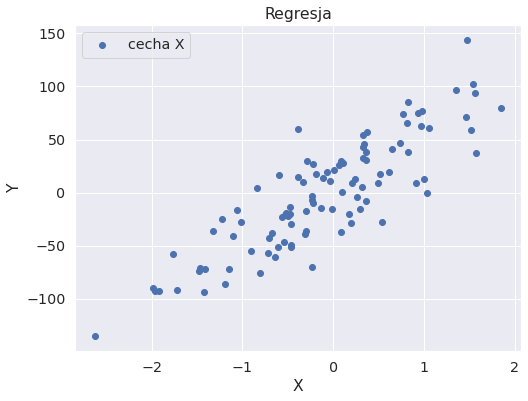

In [9]:
plt.figure(figsize = (8, 6))
plt.title('Regresja')
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(x = data, y = target, label = 'cecha X')
plt.legend()
plt.plot()

In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(data, target)
# Domyślnie zaimplemetowano wskaźnik R2 score
model.score(data, target)

0.7426670084336404

In [11]:
model.intercept_

3.4953459615809175

Robimy predykcję na naszym modelu

In [13]:
y_pred = model.predict(data)
y_pred

array([49.90, 7.83, -49.21, 19.15, -20.38, 35.77, -19.60, 30.53, 33.97, 53.50, 44.45, 80.13, 40.29, -7.45, -36.79,
       8.07, -94.15, 29.07, 54.87, -127.04, 28.25, 8.33, -19.71, 49.11, 81.46, 76.53, -26.43, 1.71, -26.49, -56.11,
       21.29, 22.22, 16.50, -22.90, -41.75, 13.30, -11.40, 21.52, 44.48, -11.04, 21.50, -30.24, 79.39, -22.33, -8.17,
       -16.04, -11.51, -28.65, 19.88, 13.90, -12.83, 3.75, -8.17, 77.14, -15.69, 20.62, 20.00, -5.76, -8.19, -95.54,
       19.64, -7.75, -51.63, -31.49, -69.43, 51.76, -82.46, -91.84, -24.52, 41.74, 43.98, -66.88, -70.18, -57.34,
       -38.32, 82.19, 52.11, 15.55, 18.25, -23.63, -84.36, 9.02, 12.03, -62.69, 56.17, -2.27, -19.90, 2.82, -46.97,
       -3.39, -53.86, 71.08, 6.86, -21.51, -19.46, 95.79, -67.50, -32.37, -0.09, -11.91])

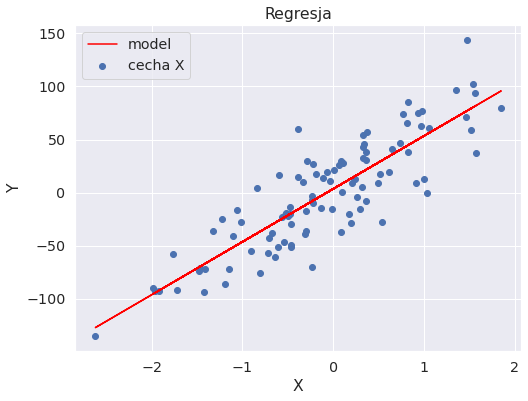

In [15]:
plt.figure(figsize = (8, 6))
plt.title('Regresja')
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(x = data, y = target, label = 'cecha X')
plt.plot(data, y_pred, color='red', label = 'model')
plt.legend()
plt.show()

In [19]:
model.score(data, target)

0.7426670084336404

In [21]:
[item for item in dir(model) if not item.startswith('_')]

['coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_jobs',
 'normalize',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [22]:
model.coef_

array([49.83])

In [23]:
model.intercept_

3.4953459615809175

In [29]:
print(f'y = {model.intercept_:.4f} + {model.coef_[0]:.4f}x')

y = 3.4953 + 49.8293x


In [41]:
data, target = make_regression(n_samples = 1000, n_features = 1, n_targets = 1, noise = 15.0, random_state = 42)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = 0.25)

print(f'x_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_test shape: {y_test.shape}')

x_train shape: (750, 1)
y_train shape: (750,)
x_test shape: (250, 1)
y_test shape: (250,)


In [42]:
model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_train, y_train)


0.5638712318645116

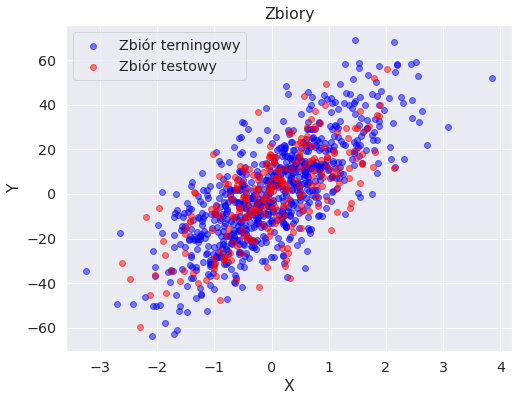

In [47]:
plt.figure(figsize = (8, 6))
plt.title('Zbiory')
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(x_train, y_train, color = 'blue', alpha = 0.5, label = 'Zbiór terningowy')
plt.scatter(x_test, y_test, color = 'red', alpha = 0.5, label = 'Zbiór testowy')
plt.legend()
plt.show()

In [48]:
model.score(x_test, y_test)

0.46892390257939565

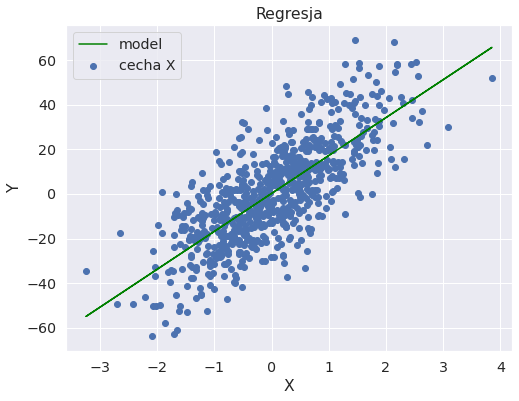

In [50]:
plt.figure(figsize = (8, 6))
plt.title('Regresja - zbiór treningowy')
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(x = x_train, y = y_train, label = 'cecha X')
plt.plot(x_train, model.intercept_ + model.coef_[0]*x_train, color='green', label = 'model')
plt.legend()
plt.show()

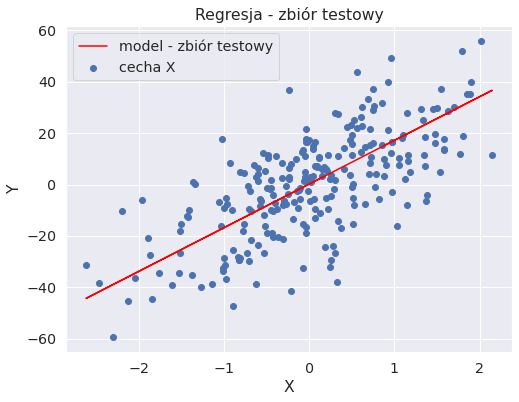

In [52]:
plt.figure(figsize = (8, 6))
plt.title('Regresja - zbiór testowy')
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(x = x_test, y = y_test, label = 'cecha X')
plt.plot(x_test, model.intercept_ + model.coef_[0]*x_test, color='red', label = 'model - zbiór testowy')
plt.legend()
plt.show()

In [53]:
y_pred = model.predict(x_test)


In [54]:
y = pd.DataFrame({'y_emp' : y_test, 'y_pred' : y_pred})
y.head()

,y_emp,y_pred
0,-24.245483,3.375777
1,1.161604,0.560628
2,3.915649,-10.024922
3,30.300394,29.041900
4,-12.251204,-24.107610


In [55]:
y['error'] = y.y_emp - y.y_pred


In [56]:
y.head()

,y_emp,y_pred,error
0,-24.245483,3.375777,-27.621260
1,1.161604,0.560628,0.600976
2,3.915649,-10.024922,13.940570
3,30.300394,29.041900,1.258494
4,-12.251204,-24.107610,11.856406


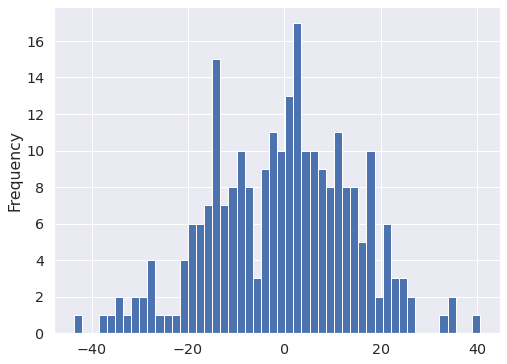

In [58]:
_ = y['error'].plot(kind = 'hist', bins = 50, figsize = (8, 6))